In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
from IPython.display import Image
import shutil
import os
from random import choice

In [3]:
!unzip "/content/drive/MyDrive/skinproduct/skin_cancer.v2i.yolov5pytorch.zip" -d "/content/drive/MyDrive/skinproduct/yolov5"

Archive:  /content/drive/MyDrive/skinproduct/skin_cancer.v2i.yolov5pytorch.zip
 extracting: /content/drive/MyDrive/skinproduct/yolov5/README.dataset.txt  
 extracting: /content/drive/MyDrive/skinproduct/yolov5/README.roboflow.txt  
 extracting: /content/drive/MyDrive/skinproduct/yolov5/data.yaml  
   creating: /content/drive/MyDrive/skinproduct/yolov5/test/
   creating: /content/drive/MyDrive/skinproduct/yolov5/test/images/
 extracting: /content/drive/MyDrive/skinproduct/yolov5/test/images/acne26_png.rf.e78d1f98ad96113eef578ad16a881815.jpg  
 extracting: /content/drive/MyDrive/skinproduct/yolov5/test/images/acne27_png.rf.3fea2046d5ce84a13dff394307f4c81b.jpg  
 extracting: /content/drive/MyDrive/skinproduct/yolov5/test/images/acne28_png.rf.b54a6c160dc42bd388c7162995440621.jpg  
 extracting: /content/drive/MyDrive/skinproduct/yolov5/test/images/acne29_png.rf.ce406ba167195b1aca7902a21ce6649d.jpg  
 extracting: /content/drive/MyDrive/skinproduct/yolov5/test/images/acne30_png.rf.d8d35f0b2c5

In [4]:
!unzip "/content/drive/MyDrive/skinproduct/skin_cancer.v2i.mt-yolov6.zip" -d "/content/drive/MyDrive/skinproduct/yolov6"

Archive:  /content/drive/MyDrive/skinproduct/skin_cancer.v2i.mt-yolov6.zip
 extracting: /content/drive/MyDrive/skinproduct/yolov6/README.dataset.txt  
 extracting: /content/drive/MyDrive/skinproduct/yolov6/README.roboflow.txt  
 extracting: /content/drive/MyDrive/skinproduct/yolov6/data.yaml  
   creating: /content/drive/MyDrive/skinproduct/yolov6/images/
   creating: /content/drive/MyDrive/skinproduct/yolov6/images/test/
 extracting: /content/drive/MyDrive/skinproduct/yolov6/images/test/acne26_png.rf.e78d1f98ad96113eef578ad16a881815.jpg  
 extracting: /content/drive/MyDrive/skinproduct/yolov6/images/test/acne27_png.rf.3fea2046d5ce84a13dff394307f4c81b.jpg  
 extracting: /content/drive/MyDrive/skinproduct/yolov6/images/test/acne28_png.rf.b54a6c160dc42bd388c7162995440621.jpg  
 extracting: /content/drive/MyDrive/skinproduct/yolov6/images/test/acne29_png.rf.ce406ba167195b1aca7902a21ce6649d.jpg  
 extracting: /content/drive/MyDrive/skinproduct/yolov6/images/test/acne30_png.rf.d8d35f0b2c50d

In [5]:
!unzip "/content/drive/MyDrive/skinproduct/skin_cancer.v2i.yolov7pytorch.zip" -d "/content/drive/MyDrive/skinproduct/yolov7"

Archive:  /content/drive/MyDrive/skinproduct/skin_cancer.v2i.yolov7pytorch.zip
 extracting: /content/drive/MyDrive/skinproduct/yolov7/README.dataset.txt  
 extracting: /content/drive/MyDrive/skinproduct/yolov7/README.roboflow.txt  
 extracting: /content/drive/MyDrive/skinproduct/yolov7/data.yaml  
   creating: /content/drive/MyDrive/skinproduct/yolov7/test/
   creating: /content/drive/MyDrive/skinproduct/yolov7/test/images/
 extracting: /content/drive/MyDrive/skinproduct/yolov7/test/images/acne26_png.rf.e78d1f98ad96113eef578ad16a881815.jpg  
 extracting: /content/drive/MyDrive/skinproduct/yolov7/test/images/acne27_png.rf.3fea2046d5ce84a13dff394307f4c81b.jpg  
 extracting: /content/drive/MyDrive/skinproduct/yolov7/test/images/acne28_png.rf.b54a6c160dc42bd388c7162995440621.jpg  
 extracting: /content/drive/MyDrive/skinproduct/yolov7/test/images/acne29_png.rf.ce406ba167195b1aca7902a21ce6649d.jpg  
 extracting: /content/drive/MyDrive/skinproduct/yolov7/test/images/acne30_png.rf.d8d35f0b2c5

# **YoloV5**

In [6]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16413, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 16413 (delta 0), reused 4 (delta 0), pack-reused 16408
Receiving objects: 100% (16413/16413), 14.96 MiB | 22.27 MiB/s, done.
Resolving deltas: 100% (11263/11263), done.


In [7]:
%cd /content/yolov5/

/content/yolov5


In [8]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.4/709.4 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.9 MB/s eta 0:00:00


In [9]:
with open(r'/content/drive/MyDrive/skinproduct/yolov5/data.yaml', 'r') as file:
    lines = file.readlines()
    print(lines)

['train: /content/drive/MyDrive/skinproduct/yolov5/train/images\n', 'val: /content/drive/MyDrive/skinproduct/yolov5/test/images\n', '\n', '\n', 'nc: 3\n', "names: ['Acne', 'spots', 'wrinkles']\n", '\n', 'roboflow:\n', '  workspace: dataset-aq7x0\n', '  project: skin_cancer-7b7pp\n', '  version: 2\n', '  license: CC BY 4.0\n', '  url: https://universe.roboflow.com/dataset-aq7x0/skin_cancer-7b7pp/dataset/2']


In [12]:
!wandb disabled
!python train.py --img 415 --epochs 30 --data /content/drive/MyDrive/skinproduct/yolov5/data.yaml --weights yolov5x6.pt --cache --workers 2

/bin/bash: line 1: wandb: command not found
2024-02-08 07:29:11.207371: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-08 07:29:11.207432: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-08 07:29:11.208936: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5x6.pt, cfg=, data=/content/drive/MyDrive/skinproduct/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket

In [1]:
p = 29.2
r = 31.5
mAP50 = 20.4

In [13]:
!zip -r /content/drive/MyDrive/skinproduct/file.zip /content/yolov5

  adding: content/yolov5/ (stored 0%)
  adding: content/yolov5/utils/ (stored 0%)
  adding: content/yolov5/utils/loggers/ (stored 0%)
  adding: content/yolov5/utils/loggers/comet/ (stored 0%)
  adding: content/yolov5/utils/loggers/comet/__init__.py (deflated 74%)
  adding: content/yolov5/utils/loggers/comet/optimizer_config.json (deflated 82%)
  adding: content/yolov5/utils/loggers/comet/hpo.py (deflated 68%)
  adding: content/yolov5/utils/loggers/comet/comet_utils.py (deflated 69%)
  adding: content/yolov5/utils/loggers/comet/__pycache__/ (stored 0%)
  adding: content/yolov5/utils/loggers/comet/__pycache__/comet_utils.cpython-310.pyc (deflated 47%)
  adding: content/yolov5/utils/loggers/comet/__pycache__/__init__.cpython-310.pyc (deflated 50%)
  adding: content/yolov5/utils/loggers/comet/README.md (deflated 64%)
  adding: content/yolov5/utils/loggers/wandb/ (stored 0%)
  adding: content/yolov5/utils/loggers/wandb/__init__.py (stored 0%)
  adding: content/yolov5/utils/loggers/wandb/wan

**YoloV6**

In [14]:
%cd ..

/content


In [15]:
!git clone https://github.com/meituan/YOLOv6.git

Cloning into 'YOLOv6'...
remote: Enumerating objects: 3834, done.
remote: Counting objects: 100% (1714/1714), done.
remote: Compressing objects: 100% (328/328), done.
remote: Total 3834 (delta 1507), reused 1400 (delta 1386), pack-reused 2120
Receiving objects: 100% (3834/3834), 47.12 MiB | 30.44 MiB/s, done.
Resolving deltas: 100% (2339/2339), done.


In [16]:
%cd /content/YOLOv6

/content/YOLOv6


In [17]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 91.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [18]:
!python tools/train.py --batch 2 --epochs 30 --conf configs/yolov6s_finetune.py --data /content/drive/MyDrive/skinproduct/yolov6/data.yaml --fuse_ab --device 0

2024-02-08 07:47:06.176773: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-08 07:47:06.176828: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-08 07:47:06.178237: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-08 07:47:06.188433: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-08 07:47:09.081049: W tensorflow/comp

In [2]:
p1 = 17.2
r1 = 28.1
mAP501 = 13.7

**YoloV7**

In [19]:
%cd ..

/content


In [20]:
!git clone https://github.com/WongKinYiu/yolov7.git

Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197
Receiving objects: 100% (1197/1197), 74.23 MiB | 21.43 MiB/s, done.
Resolving deltas: 100% (519/519), done.


In [21]:
%cd /content/yolov7/

/content/yolov7


In [22]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [23]:
!python train.py  --weights yolov7.pt --epochs 30 --data "/content/drive/MyDrive/skinproduct/yolov7/data.yaml" --workers 4 --batch-size 4 --img 416 --cfg cfg/training/yolov7.yaml --name yolov7 --hyp data/hyp.scratch.p5.yaml

2024-02-08 08:09:04.873635: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-08 08:09:04.873709: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-08 08:09:04.875049: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-08 08:09:04.882493: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-08 08:09:06.768812: W tensorflow/comp

In [3]:

p2 =  6.59
r2 = 5.17
mAP502 = 5.17

**YoloV8**

In [ ]:
%cd ..

/content


In [2]:
%cd /content/

/content


In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.4/709.4 kB 9.5 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")

results = model.train(data="/content/drive/MyDrive/skinproduct/yolov5/data.yaml", epochs=30, imgsz=416)

100%|██████████| 6.23M/6.23M [00:00<00:00, 25.5MB/s]


Ultralytics YOLOv8.1.10 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/skinproduct/yolov5/data.yaml, epochs=30, time=None, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

100%|██████████| 755k/755k [00:00<00:00, 5.11MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/skinproduct/yolov5/train/labels... 443 images, 0 backgrounds, 0 corrupt: 100%|██████████| 443/443 [05:46<00:00,  1.28it/s]


train: New cache created: /content/drive/MyDrive/skinproduct/yolov5/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/skinproduct/yolov5/test/labels... 114 images, 0 backgrounds, 0 corrupt: 100%|██████████| 114/114 [01:32<00:00,  1.23it/s]

val: New cache created: /content/drive/MyDrive/skinproduct/yolov5/test/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      1.42G      3.168      3.937      2.094         76        416: 100%|██████████| 28/28 [00:15<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        114        741    0.00241      0.128    0.00285   0.000754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      1.43G      2.835      2.894      1.709         86        416: 100%|██████████| 28/28 [00:09<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        114        741     0.0173      0.591     0.0234    0.00625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      1.44G      2.805      2.624      1.759        130        416: 100%|██████████| 28/28 [00:08<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]


                   all        114        741      0.114      0.157     0.0464     0.0121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      1.44G      2.707      2.491      1.735        107        416: 100%|██████████| 28/28 [00:07<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all        114        741      0.126      0.117     0.0491     0.0122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      1.43G      2.638      2.447      1.684        107        416: 100%|██████████| 28/28 [00:08<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]

                   all        114        741      0.129      0.206      0.081     0.0222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      1.43G      2.631      2.374      1.668        119        416: 100%|██████████| 28/28 [00:09<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        114        741       0.18      0.248      0.102     0.0245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      1.44G      2.579       2.36       1.65        148        416: 100%|██████████| 28/28 [00:09<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        114        741      0.117      0.279     0.0791     0.0213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      1.44G      2.572      2.296      1.646         85        416: 100%|██████████| 28/28 [00:09<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]


                   all        114        741      0.136      0.191     0.0922     0.0273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      1.44G      2.511      2.272      1.611         92        416: 100%|██████████| 28/28 [00:08<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all        114        741      0.438      0.121       0.09     0.0249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      1.43G       2.51      2.212      1.614         89        416: 100%|██████████| 28/28 [00:07<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]

                   all        114        741      0.176      0.245      0.126     0.0374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      1.44G      2.495       2.22      1.594        130        416: 100%|██████████| 28/28 [00:08<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        114        741      0.171      0.279      0.121      0.037



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      1.44G      2.471      2.215      1.605        178        416: 100%|██████████| 28/28 [00:09<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        114        741      0.193      0.277      0.119     0.0351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      1.44G       2.47      2.185       1.59        142        416: 100%|██████████| 28/28 [00:09<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        114        741      0.181       0.21      0.135     0.0406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      1.44G      2.443      2.137      1.596         99        416: 100%|██████████| 28/28 [00:09<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all        114        741      0.182      0.278      0.142     0.0419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      1.44G      2.476      2.171      1.597        168        416: 100%|██████████| 28/28 [00:08<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        114        741      0.206      0.258      0.142     0.0411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      1.44G      2.389      2.092       1.56        112        416: 100%|██████████| 28/28 [00:07<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]

                   all        114        741      0.213      0.297      0.165     0.0484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      1.44G      2.421      2.069      1.541        152        416: 100%|██████████| 28/28 [00:08<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        114        741      0.193      0.298      0.121     0.0334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      1.44G      2.428      2.117      1.583        139        416: 100%|██████████| 28/28 [00:09<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]


                   all        114        741      0.204      0.273      0.154     0.0444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      1.44G      2.385      2.072       1.53        163        416: 100%|██████████| 28/28 [00:09<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        114        741      0.247      0.262      0.168     0.0518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      1.44G      2.378      2.035      1.537         98        416: 100%|██████████| 28/28 [00:09<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        114        741      0.257      0.291      0.185     0.0578


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      1.44G      2.371      2.108       1.63         61        416: 100%|██████████| 28/28 [00:12<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        114        741      0.276      0.264      0.188     0.0578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      1.44G      2.311      2.057      1.602         74        416: 100%|██████████| 28/28 [00:07<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        114        741      0.235       0.29      0.177     0.0549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      1.44G      2.325       2.02      1.593         87        416: 100%|██████████| 28/28 [00:07<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]


                   all        114        741      0.241      0.307      0.178     0.0546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      1.44G      2.287      2.014      1.589         68        416: 100%|██████████| 28/28 [00:08<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]

                   all        114        741      0.447      0.184      0.176     0.0511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      1.43G      2.256      1.969      1.556         72        416: 100%|██████████| 28/28 [00:08<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        114        741      0.243      0.263      0.178     0.0489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      1.44G      2.273      1.928      1.569         82        416: 100%|██████████| 28/28 [00:08<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        114        741      0.251      0.305      0.185     0.0501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      1.44G      2.249       1.95      1.545         81        416: 100%|██████████| 28/28 [00:07<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]


                   all        114        741      0.294      0.317        0.2     0.0588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      1.43G      2.245      1.903      1.555         91        416: 100%|██████████| 28/28 [00:08<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        114        741      0.299      0.289      0.202     0.0581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      1.44G      2.234      1.912      1.537         91        416: 100%|██████████| 28/28 [00:08<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        114        741      0.248      0.297      0.183     0.0527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      1.44G      2.228      1.897      1.545         88        416: 100%|██████████| 28/28 [00:08<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]


                   all        114        741      0.265      0.318      0.196     0.0593

30 epochs completed in 0.098 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.10 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


                   all        114        741      0.265       0.32      0.197     0.0594
                  Acne        114        103      0.175      0.359      0.136     0.0422
                 spots        114        458        0.3     0.0633     0.0948     0.0249
              wrinkles        114        180      0.321      0.539       0.36      0.111
Speed: 0.3ms preprocess, 2.6ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/train


In [4]:
p3 = 26.5
r3 = 32.0
mAP503 = 19.7

**Comparison**

In [5]:
score = [mAP50,mAP501,mAP502,mAP503]
score1 = [p,p1,p2,p3]
score2 = [r,r1,r2,r3]

In [6]:
import numpy as np

classifier = ('YoloV5','YoloV6','YoloV7','YoloV8')
y_pos = np.arange(len(classifier))

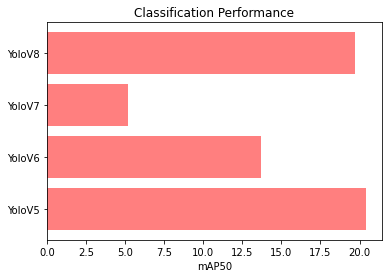

In [8]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('mAP50')
plt2.title('Classification Performance')
plt2.show()

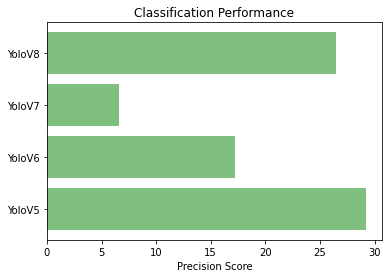

In [9]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score1, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

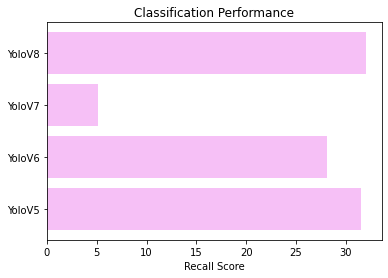

In [10]:
plt2.barh(y_pos, score2, align='center', alpha=0.5,color='violet')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()